In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from joblib import dump

In [114]:
dataset=pd.read_csv('heart.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [115]:
print(x[1])

[49 'F' 'NAP' 160 180 0 'Normal' 156 'N' 1.0 'Flat']


In [116]:
le1=LabelEncoder()
le2=LabelEncoder()
le6=LabelEncoder()
le8=LabelEncoder()
le10=LabelEncoder()
x[:,1]=le1.fit_transform(x[:,1])
x[:,2]=le2.fit_transform(x[:,2])
x[:,6]=le6.fit_transform(x[:,6])
x[:,8]=le8.fit_transform(x[:,8])
x[:,10]=le10.fit_transform(x[:,10])



In [117]:
print(le1.classes_)
print(le2.classes_)
print(le6.classes_)
print(le8.classes_)
print(le10.classes_)

['F' 'M']
['ASY' 'ATA' 'NAP' 'TA']
['LVH' 'Normal' 'ST']
['N' 'Y']
['Down' 'Flat' 'Up']


In [118]:
print(x[1])

[49 0 2 160 180 0 1 156 0 1.0 1]


In [119]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

In [120]:
#splitting Dataset 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [121]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_test

array([[ 0.20230716,  0.51017053, -0.77912558, ..., -0.78360391,
        -0.66533939, -0.60665455],
       [ 1.32722389,  0.51017053, -0.77912558, ..., -0.78360391,
        -0.40168731, -0.60665455],
       [-0.20675347,  0.51017053, -0.77912558, ..., -0.78360391,
        -0.75322342, -0.60665455],
       ...,
       [-0.10448831,  0.51017053, -0.77912558, ..., -0.78360391,
        -0.75322342,  1.0846248 ],
       [-1.63846567,  0.51017053,  0.24486804, ..., -0.78360391,
        -0.75322342,  1.0846248 ],
       [-0.00222316,  0.51017053,  1.26886166, ...,  1.27615494,
        -0.75322342, -0.60665455]])

In [122]:
#Random Forest Model Training
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train,Y_train)

RandomForestClassifier()

In [123]:
y_pred_random = model_randomforest.predict(X_test)
RandomForest_Accuracy = accuracy_score(Y_test,y_pred_random)
print(RandomForest_Accuracy*100)

85.86956521739131


In [124]:
dump(model_randomforest, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [125]:
#Logistic Regression Model Training
model_logistic=LogisticRegression()
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [126]:
y_pred_logistic = model_logistic.predict(X_test)
LogisticRegression_Accuracy = accuracy_score(Y_test,y_pred_logistic)
print(LogisticRegression_Accuracy*100)

83.69565217391305


In [127]:
dump(model_logistic, 'logistic_Regression_model.joblib')

['logistic_Regression_model.joblib']

In [128]:
#Kneighbors Classification Model
model_kneighbors=KNeighborsClassifier()
model_kneighbors.fit(X_train,Y_train)


KNeighborsClassifier()

In [129]:
y_pred_neighbors = model_kneighbors.predict(X_test)
KNeighbors_Accuracy = accuracy_score(Y_test,y_pred_neighbors)
print(KNeighbors_Accuracy*100)

85.32608695652173


In [130]:
dump(model_kneighbors, 'KNeighbors_model.joblib')

['KNeighbors_model.joblib']

In [131]:
# Decision Tree Classifier
model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)


DecisionTreeClassifier()

In [132]:
y_pred_decision = model_decision.predict(X_test)
Decision_Accuracy = accuracy_score(Y_test,y_pred_decision)
print(Decision_Accuracy*100)

76.63043478260869


In [133]:
dump(model_decision, 'Decision_Tree_model.joblib')

['Decision_Tree_model.joblib']

In [134]:
#XG Boost Model
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
y_pred_xgb = model_xgb.predict(X_test)
XGBoost_Accuracy = accuracy_score(Y_test,y_pred_xgb)
print(XGBoost_Accuracy*100)

71.19565217391305


In [136]:
dump(model_xgb,'XGB_model.joblib')

['XGB_model.joblib']

In [137]:
#SVM Model
model_svm=SVC()
model_svm.fit(X_train,Y_train)


SVC()

In [138]:
y_pred_svm = model_svm.predict(X_test)
SVM_Accuracy = accuracy_score(Y_test,y_pred_svm)
print(SVM_Accuracy*100)

86.41304347826086


In [139]:
dump(model_svm,'SVM_model.joblib')

['SVM_model.joblib']

Text(0, 0.5, 'Accuracy')

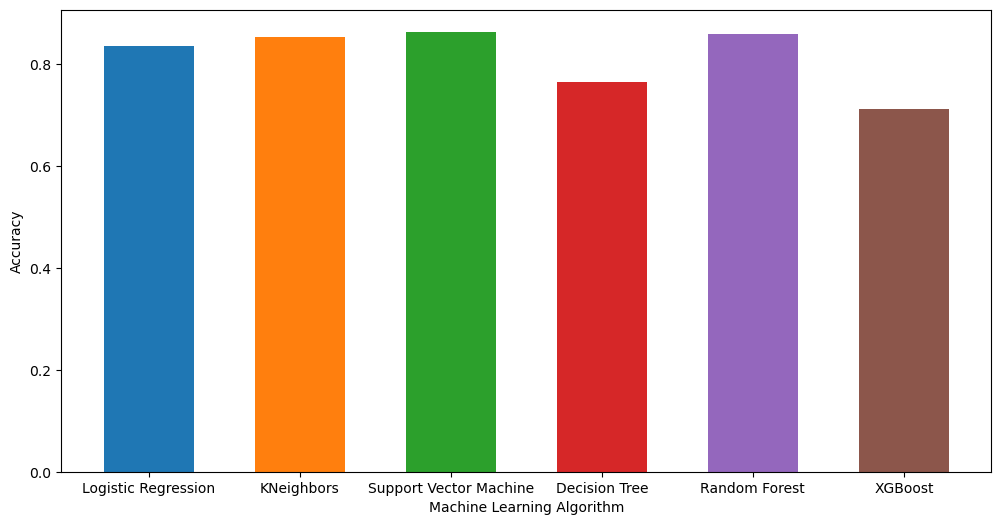

In [140]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",LogisticRegression_Accuracy,width=0.6)
plt.bar("KNeighbors",KNeighbors_Accuracy,width=0.6)
plt.bar("Support Vector Machine",SVM_Accuracy,width=0.6)
plt.bar("Decision Tree",Decision_Accuracy,width=0.6)
plt.bar("Random Forest",RandomForest_Accuracy,width=0.6)
plt.bar("XGBoost",XGBoost_Accuracy,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")
